In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


First create the reference, default gradient.

In [2]:
default_ltcg = surfaces.MicrostructuralCovarianceGradients(
    matrices.MicrostructuralCovarianceMatrix('thickness')
)
res_dir = os.path.join(datasets.OUTPUT_DIR, 'ltc', 'gradient_robustness')
os.makedirs(res_dir, exist_ok=True)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


## Parcellations:

### None

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


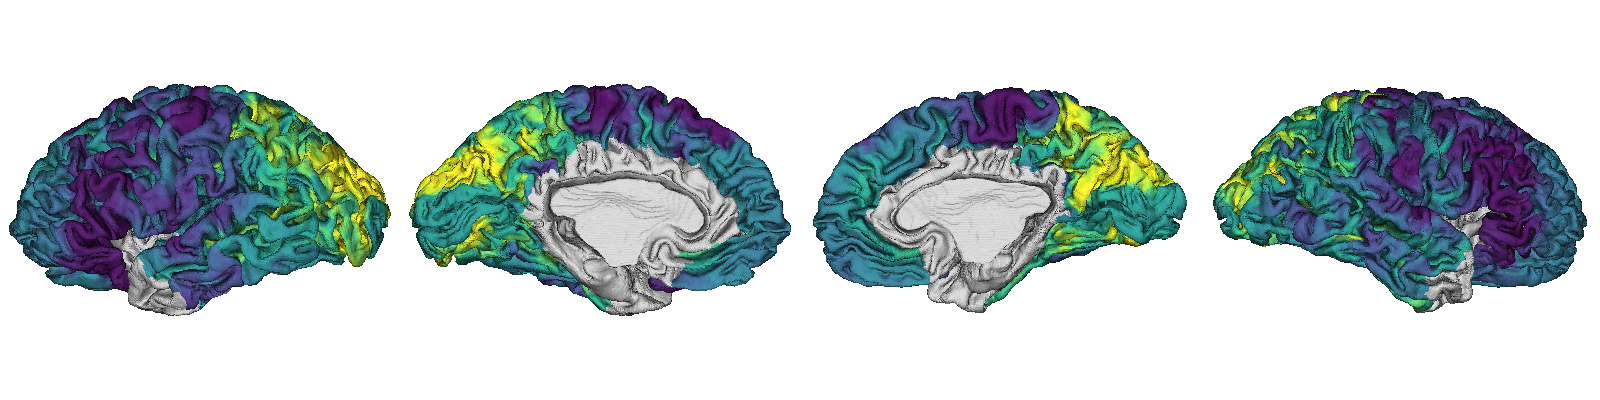

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1000.npz
0
100
200
300
400
500
600
700
800
900
Coefficient: 0.9171873930338585, p-value: 0.0
---



### schaefer1000

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


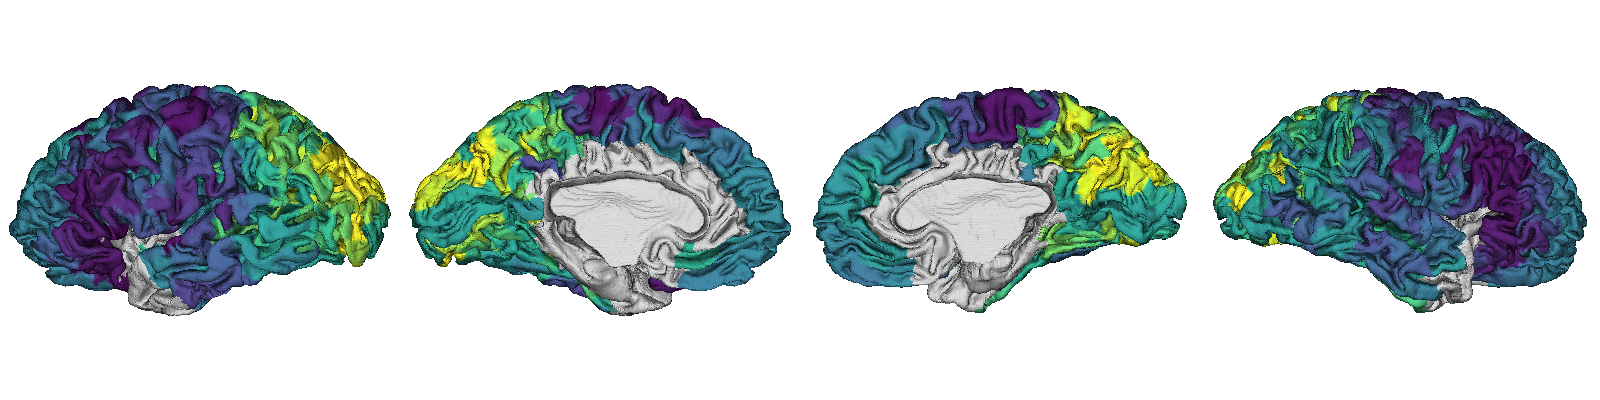

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1000.npz
0
100
200
300
400
500
600
700
800
900
Coefficient: 0.8978248318492753, p-value: 0.0
---



### schaefer400

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


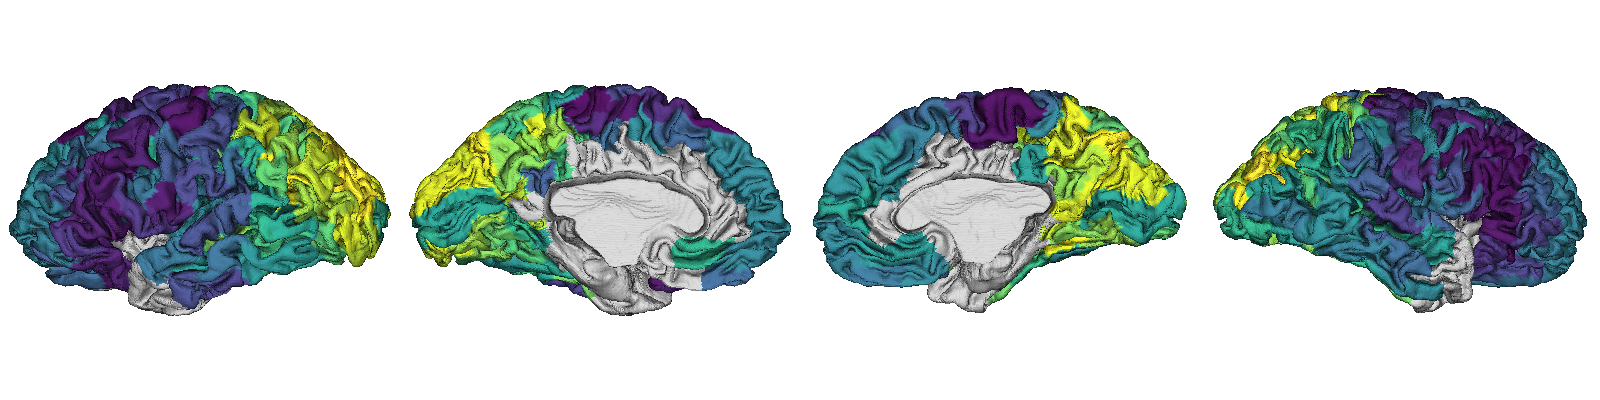

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1000.npz
0
100
200
300
400
500
600
700
800
900
Coefficient: 0.8767706521746351, p-value: 0.0
---



### aparc

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-aparc_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


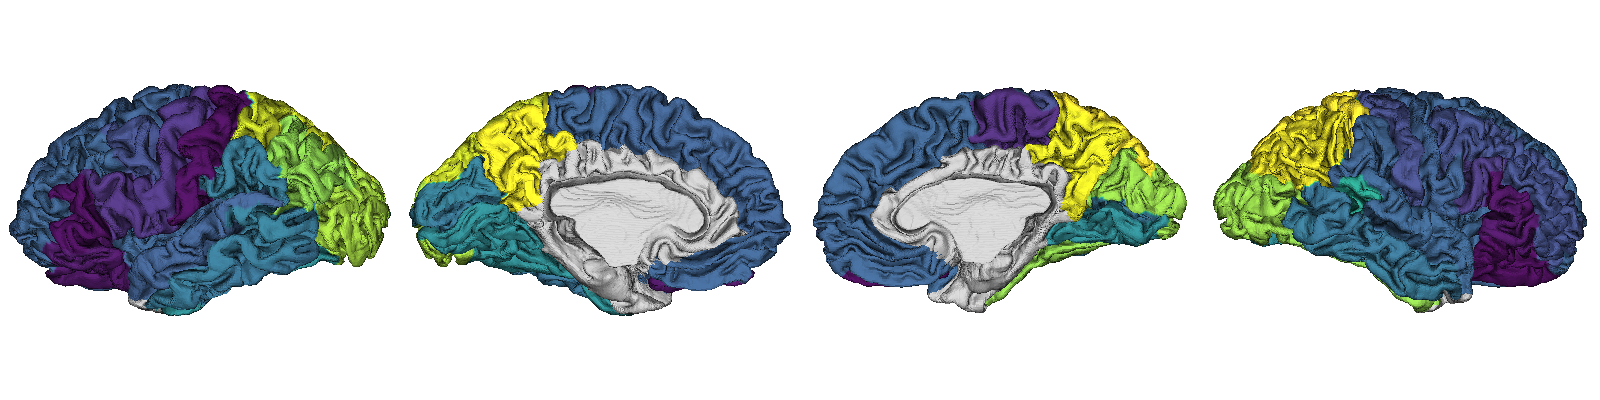

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1000.npz
0
100
200
300
400
500
600
700
800
900
Coefficient: 0.7474221150487586, p-value: 0.0
---



### mmp1

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-mmp1_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


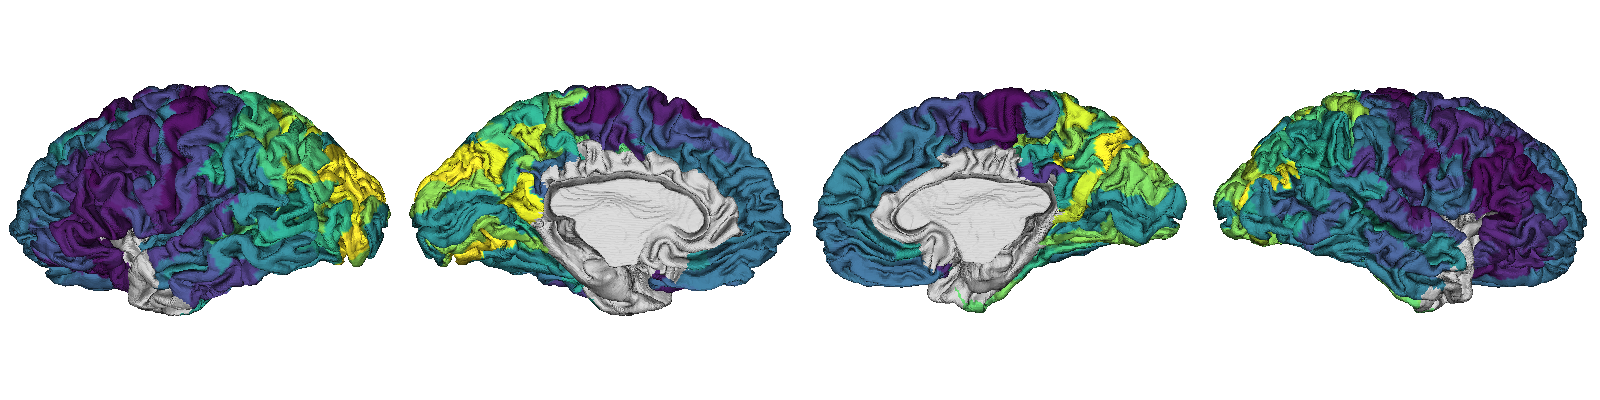

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1000.npz
0
100
200
300
400
500
600
700
800
900
Coefficient: 0.8610321386519476, p-value: 0.0
---



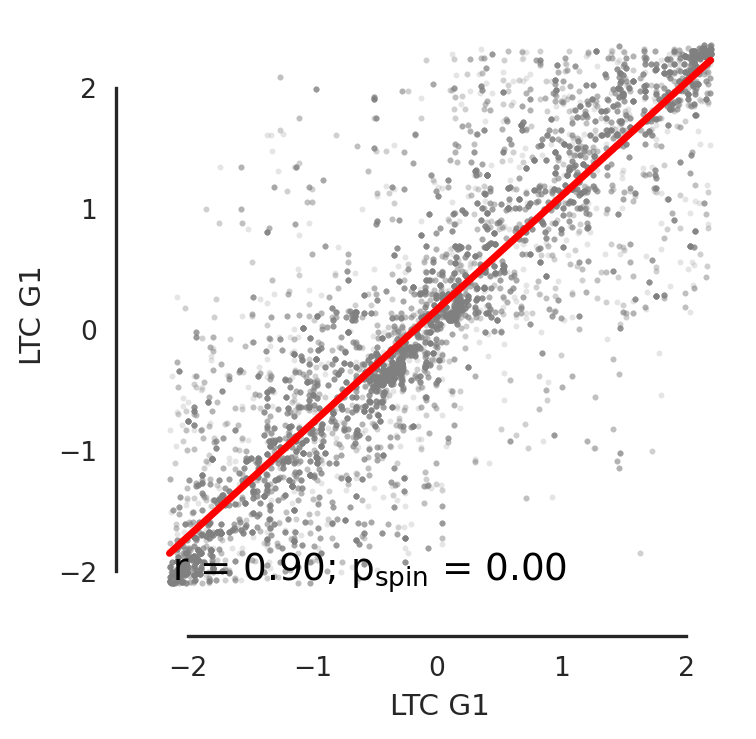

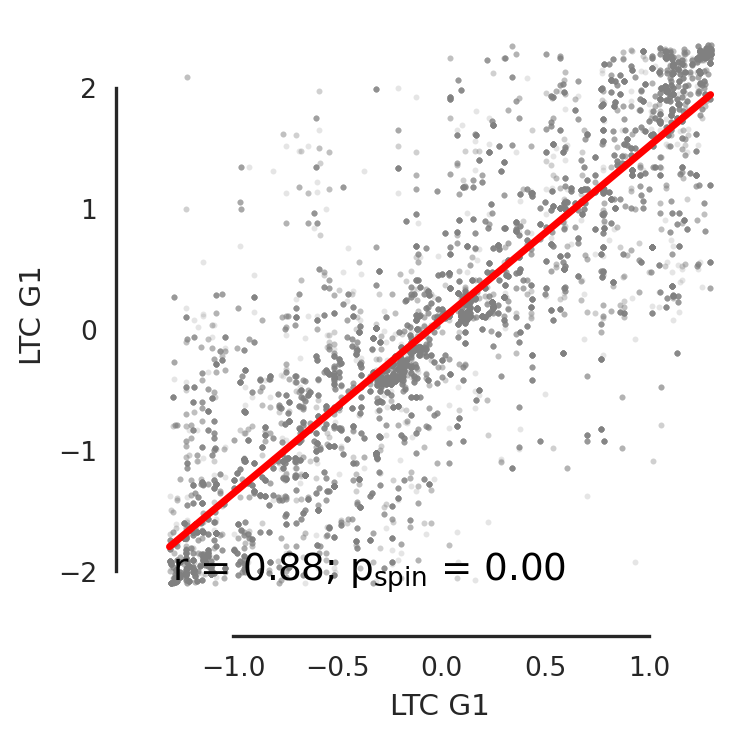

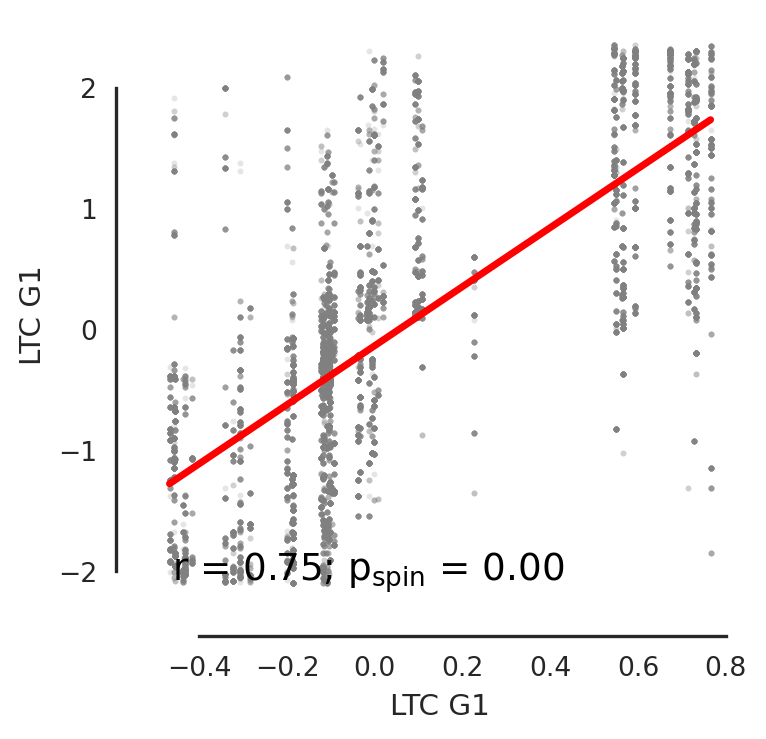

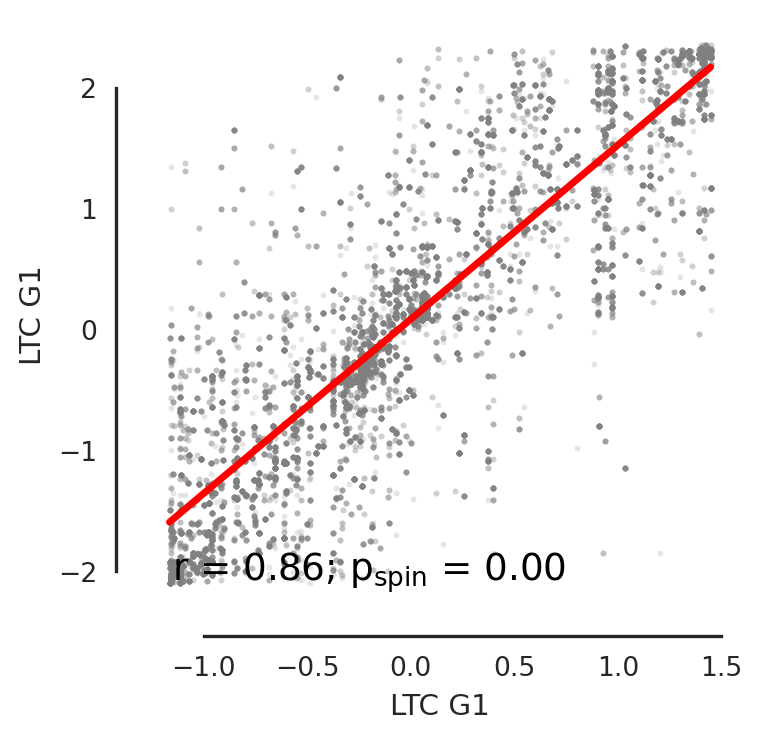

In [3]:
for parc in [None, 'schaefer1000', 'schaefer400', 'aparc', 'mmp1']:
    display(Markdown(f"### {parc}"))
    curr_ltcg = surfaces.MicrostructuralCovarianceGradients(
        matrices.MicrostructuralCovarianceMatrix('thickness', parcellation_name=parc),
        n_components_report = 1
    )
    display(curr_ltcg.plot(columns=['LTC G1']))
    coefs, pvals = curr_ltcg.correlate(default_ltcg, parcellated=False, x_columns=['LTC G1'], y_columns=['LTC G1'])
    print(f'Coefficient: {coefs.iloc[0, 0]}, p-value: {pvals.iloc[0, 0]}\n---\n')

## Including a-/dysgranular regions

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


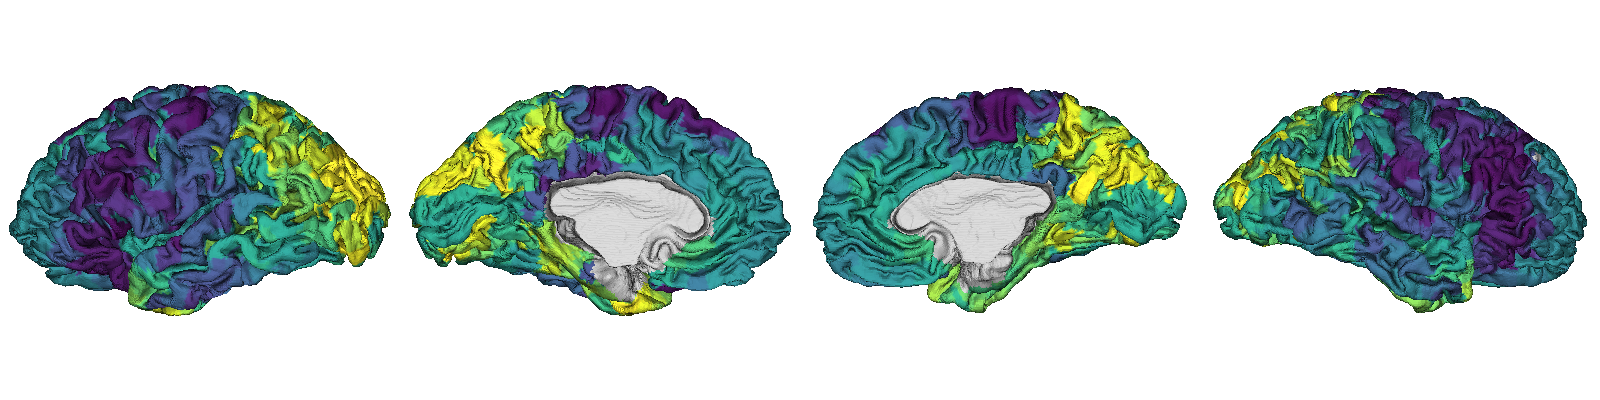

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1000.npz
0
100
200
300
400
500
600
700
800
900


Coefficient: 0.9841239502867178, p-value: 0.0
---


In [4]:
curr_ltcg = surfaces.MicrostructuralCovarianceGradients(
        matrices.MicrostructuralCovarianceMatrix('thickness', exc_regions=None),
        n_components_report = 1
    )
display(curr_ltcg.plot(columns=['LTC G1']))
coefs, pvals = curr_ltcg.correlate(default_ltcg, parcellated=False, x_columns=['LTC G1'], y_columns=['LTC G1'])
display(Markdown((f'Coefficient: {coefs.iloc[0, 0]}, p-value: {pvals.iloc[0, 0]}\n---\n')))

## LTC metric

### pearson

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-pearson/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


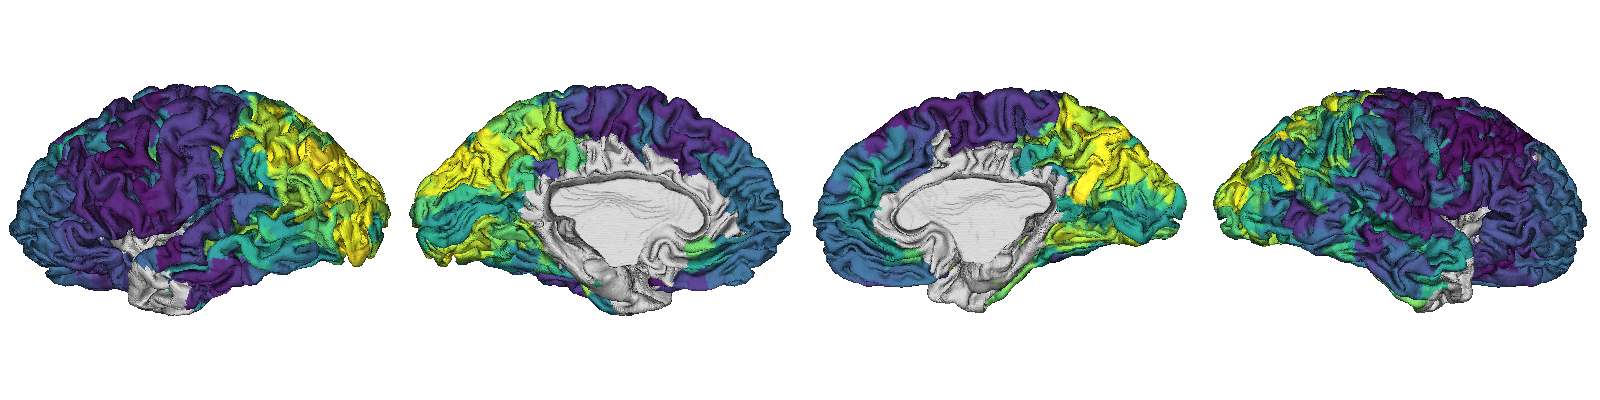

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1000.npz
0
100
200
300
400
500
600
700
800
900
Coefficient: 0.9579064669582614, p-value: 0.0
---



### euclidean

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-euclidean/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


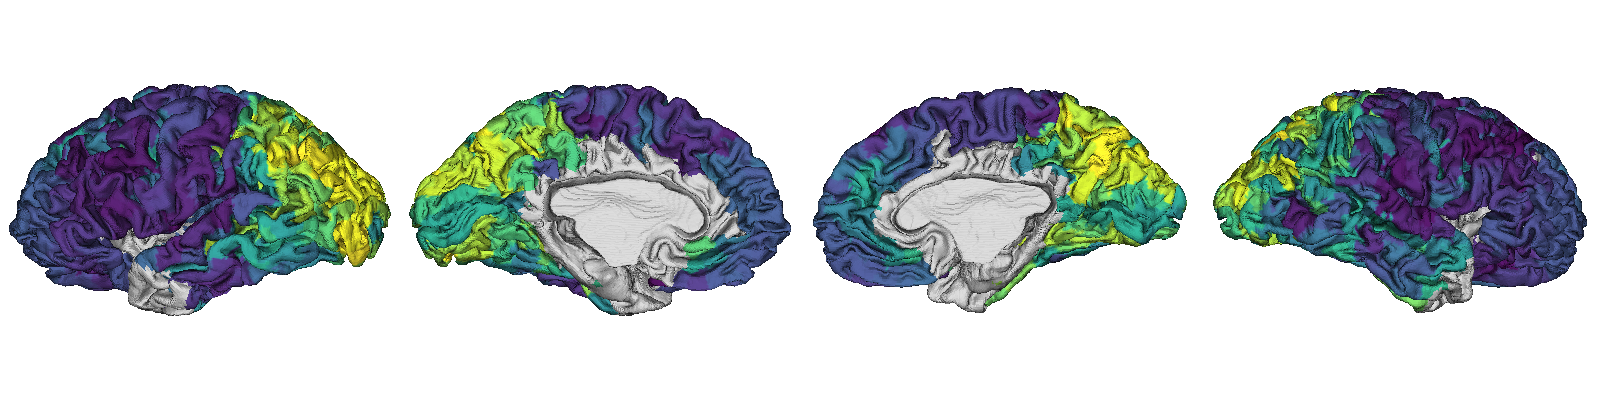

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1000.npz
0
100
200
300
400
500
600
700
800
900
Coefficient: 0.9480759234420348, p-value: 0.0
---



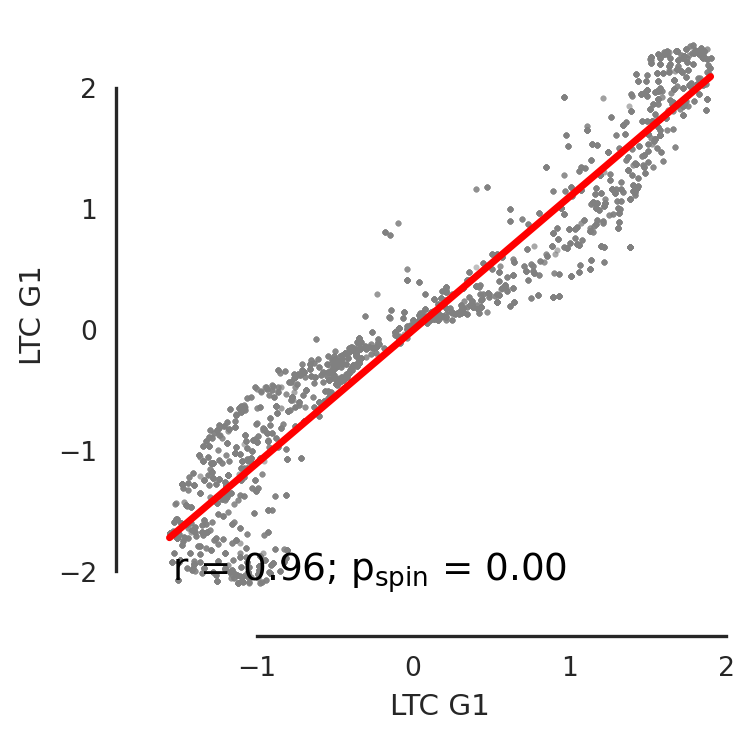

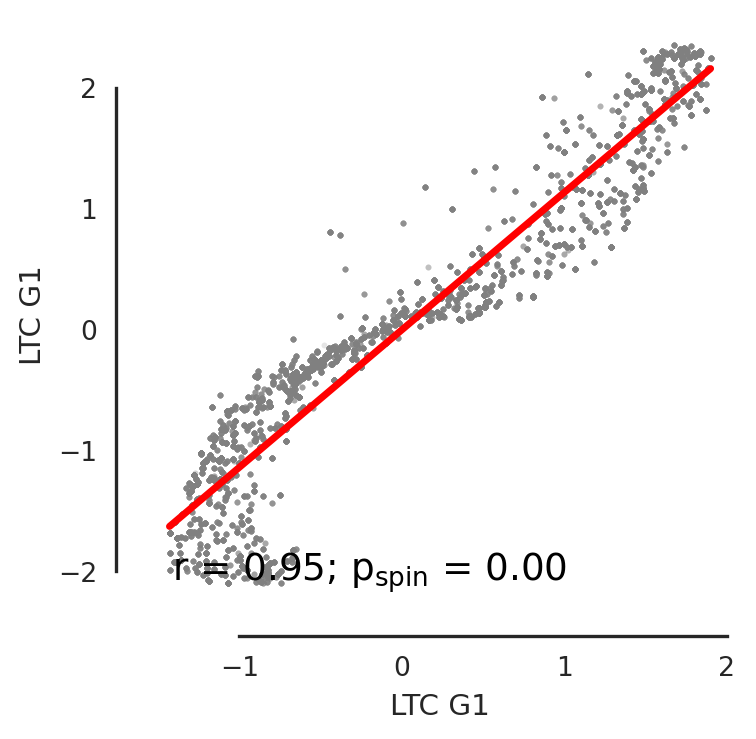

In [5]:
for metric in ['pearson', 'euclidean']:
    display(Markdown(f"### {metric}"))
    curr_ltcg = surfaces.MicrostructuralCovarianceGradients(
        matrices.MicrostructuralCovarianceMatrix('thickness', similarity_metric=metric),
        n_components_report = 1
    )
    display(curr_ltcg.plot(columns=['LTC G1']))
    coefs, pvals = curr_ltcg.correlate(default_ltcg, parcellated=False, x_columns=['LTC G1'], y_columns=['LTC G1'])
    print(f'Coefficient: {coefs.iloc[0, 0]}, p-value: {pvals.iloc[0, 0]}\n---\n')

## Dimensionality reduction approach

### gm

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


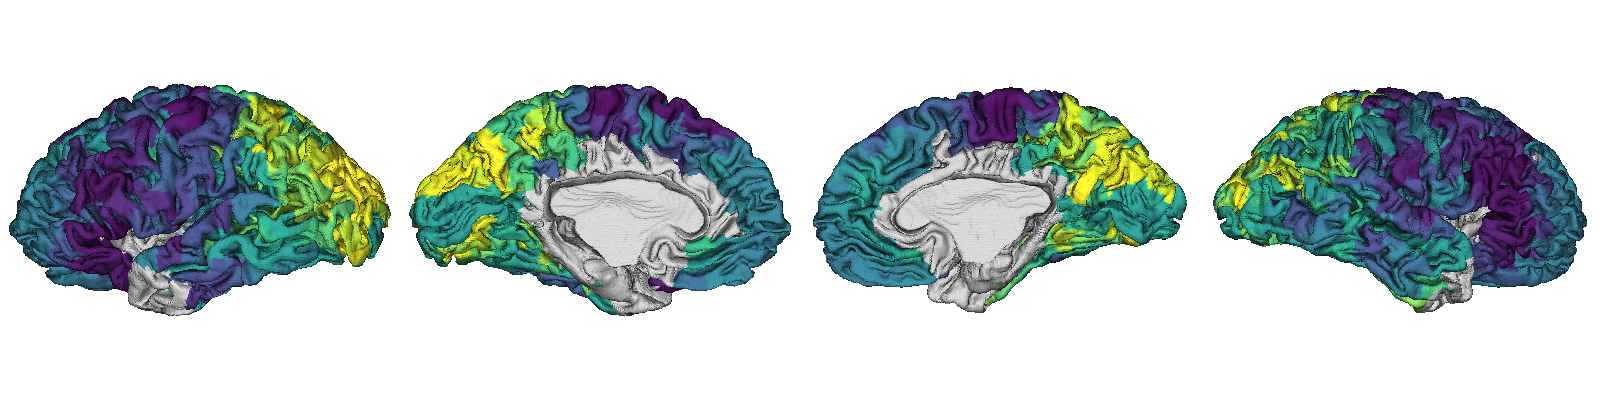

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1000.npz
0
100
200
300
400
500
600
700
800
900
Coefficient: 0.9997023746805617, p-value: 0.0
---



### le

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


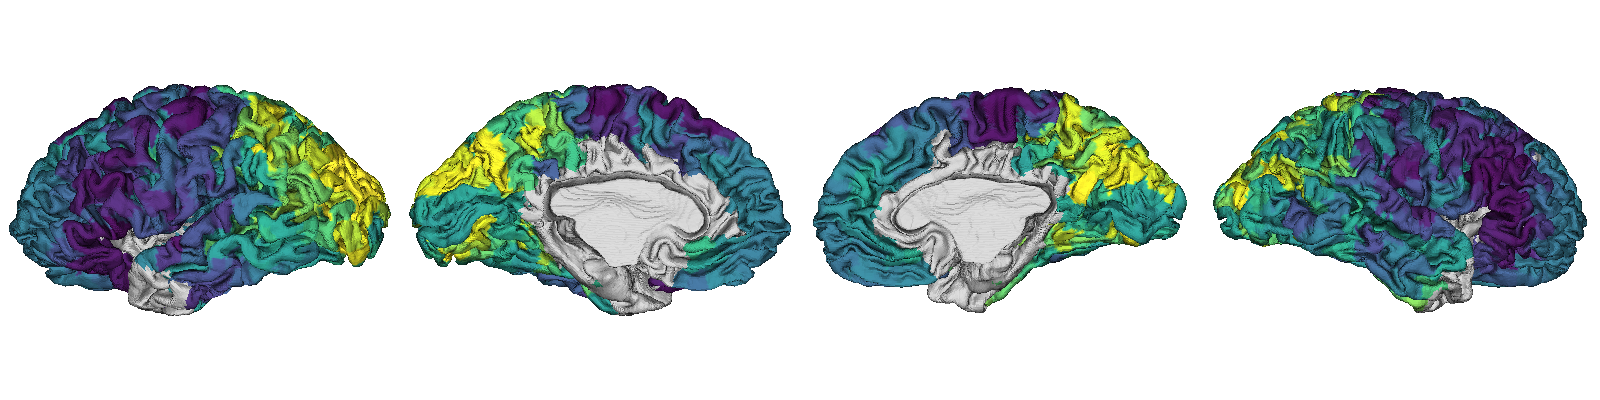

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1000.npz
0
100
200
300
400
500
600
700
800
900
Coefficient: 0.9998035722365582, p-value: 0.0
---



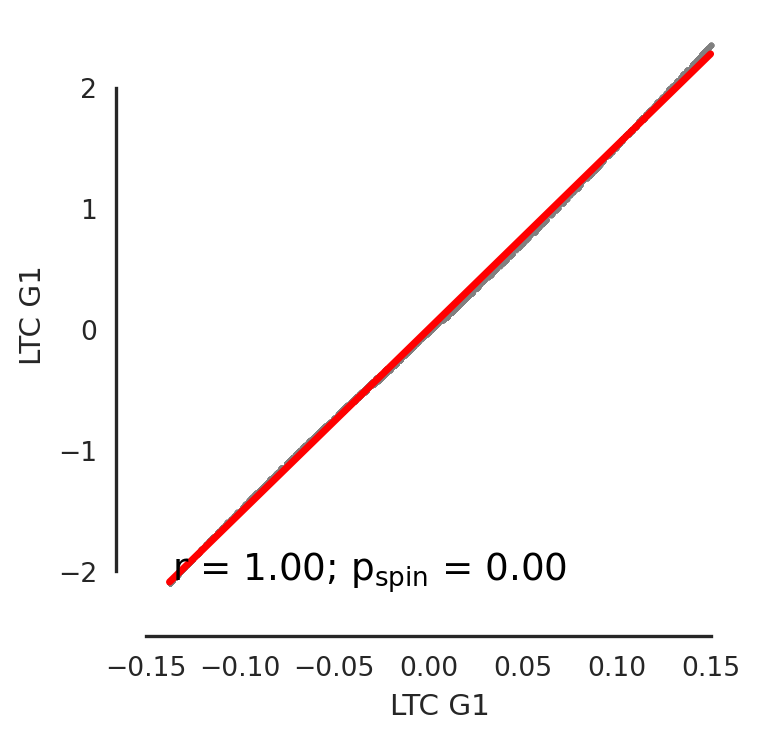

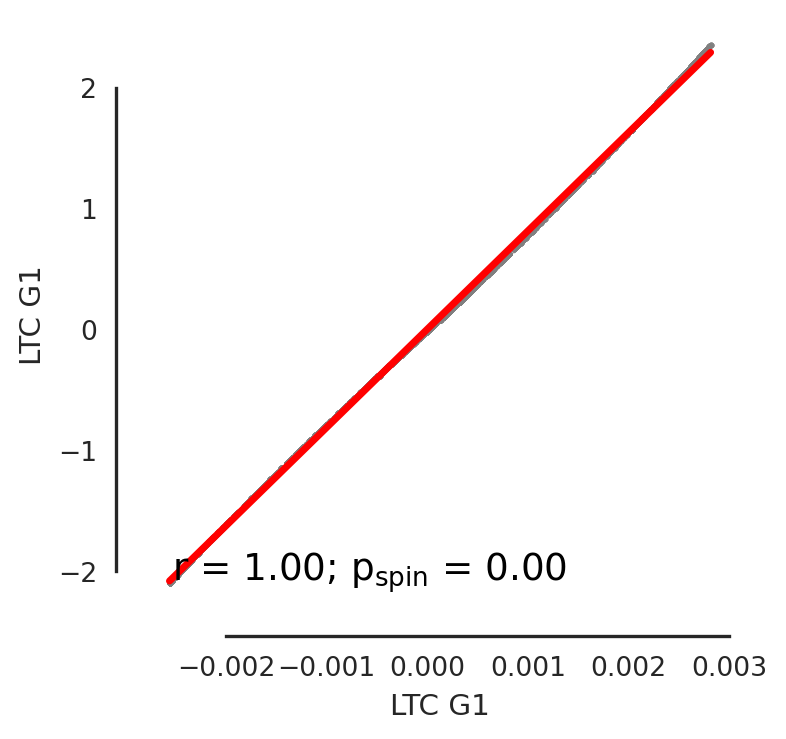

In [6]:
for approach in ['gm', 'le']:
    display(Markdown(f"### {approach}"))
    curr_ltcg = surfaces.MicrostructuralCovarianceGradients(
        matrices.MicrostructuralCovarianceMatrix('thickness'),
        approach = approach,
        n_components_report = 1
    )
    display(curr_ltcg.plot(columns=['LTC G1']))
    coefs, pvals = curr_ltcg.correlate(default_ltcg, parcellated=False, x_columns=['LTC G1'], y_columns=['LTC G1'])
    print(f'Coefficient: {coefs.iloc[0, 0]}, p-value: {pvals.iloc[0, 0]}\n---\n')

## Sparsity

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/mat

/var/lib/condor/execute/dir_1842047/ipykernel_1842869/3604500472.py:10: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  surf_data = np.hstack(ltcg_per_sparsity.values()),


0
100
200
300
400
500
600
700
800
900


Text(70.72222222222221, 0.5, '% Sparsity')

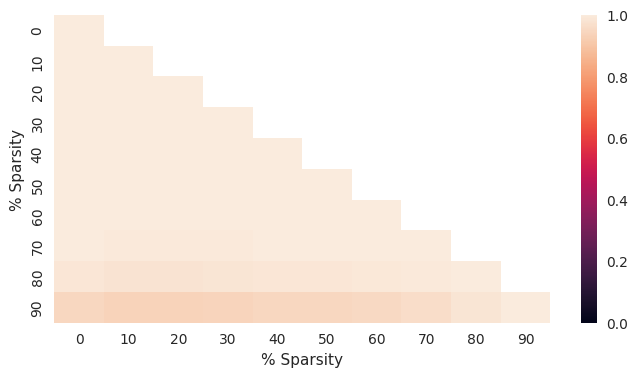

In [7]:
ltcg_per_sparsity = {}
for sparsity in np.arange(0, 1, 0.1):
    sparsity = round(sparsity, 2)
    ltcg_per_sparsity[f'Sparsity_{sparsity}'] = surfaces.MicrostructuralCovarianceGradients(
        matrices.MicrostructuralCovarianceMatrix('thickness'),
        sparsity = sparsity,
        n_components_report = 1,
    ).surf_data[:, :1]
ltcg_per_sparsity_surf_obj = surfaces.ContCorticalSurface(
    surf_data = np.hstack(ltcg_per_sparsity.values()),
    columns = list(ltcg_per_sparsity.keys()),
    label = 'LTCG with variable sparsity',
    dir_path = res_dir,
)
coefs, pvals = ltcg_per_sparsity_surf_obj.correlate(ltcg_per_sparsity_surf_obj, parcellated = False, regplot=False, barplot=False)
coefs.values[np.triu_indices_from(coefs, 1)] = np.NaN
coefs.index = coefs.columns = range(0, 100, 10)
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(coefs, vmin=0, vmax=1, ax=ax)
ax.set_xlabel('% Sparsity')
ax.set_ylabel('% Sparsity')